In [3]:
! kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 6, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [0]:
! cp kaggle.json  /root/.kaggle/kaggle.json

In [0]:
! chmod 600 /root/.kaggle/kaggle.json

In [6]:
! kaggle datasets download ellenyusa/4classimages

 57% 11.0M/19.2M [00:00<00:00, 11.7MB/s]
100% 19.2M/19.2M [00:00<00:00, 26.4MB/s]


In [13]:
! unzip -qq 4classimages.zip

replace data/cats/cat.1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
from keras.models import Model
from keras.layers import Dense #This is the layer which shows the layer is connected to all previous neuron
from keras.layers import Input
#from sklearn.datasets import make_circles
#from keras.losses import categorical_crossentropy
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from keras.layers import Conv2D, MaxPool2D, Flatten,Dropout,GlobalAveragePooling2D
import cv2


from keras.preprocessing import image
#import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator ,image
#import numpy as np

Using TensorFlow backend.


# **Here is the starting**

In [0]:
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

In [1]:
train_datagen=ImageDataGenerator(horizontal_flip=True,shear_range=.2,rotation_range=10)
train_generator=train_datagen.flow_from_directory(directory='data/',target_size=(256,256))

NameError: name 'ImageDataGenerator' is not defined

In [17]:
train_generator.class_indices

{'Humans': 0, 'cats': 1, 'dogs': 2, 'horses': 3}

In [37]:
base_model=ResNet50(weights='imagenet',input_shape=(256,256,3),include_top=False,classes=len(train_generator.class_indices)) #input_shape has to be given to make it generalised for our input images

x=base_model.output

layer_1=Flatten()(x)  # we can use avgpool or maxpool depends which we want to do and it can used to give better acc

layer_2=Dense(200,activation='tanh')(layer_1)
layer_3=Dense(100,activation='tanh')(layer_2)
layer_4=Dense(50,activation='tanh')(layer_3)
preds=Dense(len(train_generator.class_indices),activation='softmax')(layer_4) 

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
model=Model(inputs=base_model.input,outputs=preds)

In [0]:
# model.summary()

In [40]:
len(model.layers)

180

In [0]:
for layer in model.layers[:176]:
    layer.trainable=False
for layer in model.layers[176:]:
    layer.trainable=True

In [0]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
#step_size_train=train_generator.samples//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=10,
                   epochs=5)


Epoch 1/5
10/10 [==============================] - 11s 1s/step - loss: 1.1750 - acc: 0.5938
Epoch 2/5
10/10 [==============================] - 3s 289ms/step - loss: 0.4633 - acc: 0.8656
Epoch 3/5
10/10 [==============================] - 4s 416ms/step - loss: 0.2752 - acc: 0.9159
Epoch 4/5
10/10 [==============================] - 4s 449ms/step - loss: 0.2680 - acc: 0.9062
Epoch 5/5
10/10 [==============================] - 4s 418ms/step - loss: 0.1410 - acc: 0.9685


In [44]:
model.evaluate_generator(train_generator,steps=10)

[0.13678613305091858, 0.96875]

# **Now this is the end of transfer learning on resnet**

In [0]:
images_,values_=train_generator.next()

In [0]:
for i in list(np.argmax(model.predict(images_,batch_size=20),axis=1)):
  print(category_dict[i]) 

horses
Humans
cats
cats
cats
horses
Humans
dogs
cats
cats
Humans
cats
cats
horses
Humans
horses
Humans
cats
cats
dogs
horses
cats
horses
dogs
Humans
horses
horses
Humans
Humans
horses
Humans
Humans


In [0]:
model.evaluate(images_,values_)

32/32 [==============================] - 4s 118ms/step


[0.04905354231595993, 0.96875]

# **Here is the end of project self testing**

In [0]:
# for image in images_:
#   plt.figure()
#   plt.imshow(image)

In [0]:
category_dict = dict([(value, key) for key, value in (train_generator.class_indices).items()]) 

'horses'

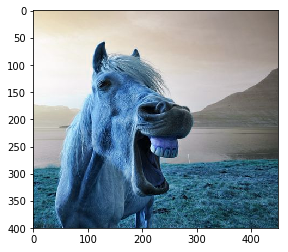

In [0]:
import cv2
animal=cv2.imread("horse.jpg")
plt.imshow(animal)
animal=animal.reshape(-1,animal.shape[0],animal.shape[1],animal.shape[2])
category_dict[list(np.argmax(model.predict(animal,batch_size=20),axis=1))[0]]
  

In [0]:
datagen=ImageDataGenerator(horizontal_flip=True,
                           vertical_flip=True,
                          zoom_range=2,
                          rotation_range=20,
                          shear_range=.3)


In [0]:
#animal=animal.reshape(-1,animal.shape[1],animal.shape[2],animal.shape[3])

In [0]:
gen=datagen.flow(animal)

In [0]:
l=[]
for i in range(100):
    animal_images=gen.next()
    l.append(animal_images)

In [0]:
l=np.array(l)

In [0]:
l.shape

(100, 1, 400, 450, 3)

In [0]:
for i in range(l.shape[0]):
  j=l[0].reshape(l[0].shape[1],l[0].shape(2),3)
  plt.figure()
  plt.imshow(j)

TypeError: ignored

In [0]:
animal_images.reshape(-1,animal_images.shape[1],animal_images.shape[2],animal_images.shape[3])

(1, 400, 450, 3)

In [0]:
for i in list(np.argmax(model.predict(l,batch_size=20),axis=1)):
  print(category_dict[i]) 

horses
cats
cats
cats
cats
cats
cats
horses
cats
cats
cats
cats
horses
cats
cats
horses
Humans
horses
horses
horses
cats
cats
cats
Humans
cats
horses
horses
cats
cats
cats
horses
horses
horses
cats
cats
cats
cats
cats
cats
cats
horses
Humans
cats
horses
cats
cats
cats
horses
cats
cats
horses
Humans
horses
cats
horses
cats
cats
cats
cats
cats
horses
cats
horses
cats
cats
cats
cats
cats
Humans
cats
horses
Humans
cats
horses
Humans
cats
cats
Humans
cats
cats
cats
horses
cats
cats
cats
cats
cats
cats
horses
Humans
cats
cats
cats
cats
cats
horses
horses
cats
cats
cats
